In [1]:
import pylab as pl
import math
import numpy as np
from scipy import linalg

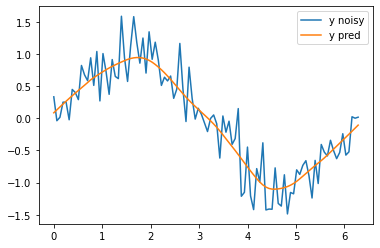

In [100]:
n = 100
iterations = 3

x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)

h = [np.sort(np.abs(x - x[i]))[25] for i in range(n)]
w = ( 1 - ( np.clip((np.abs(x[:,None] - x[None,:]) / h), 0.0, 1.0 ) ) ** 3 ) ** 3

yest = np.zeros(n)
delta = np.ones(n)

for iteration in range(iterations):
    for i in range(n):
        weights = delta * w[:, i]
        
        a = np.array([[np.sum(weights), np.sum(weights * x)], [np.sum(weights * x), np.sum(weights * x * x)]])
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        
        beta = linalg.solve(a, b)
        
        yest[i] = beta[0] + beta[1] * x[i]
        
    residuals = y - yest
    s = np.median(np.abs(residuals))
    
    delta = ( 1 - ( np.clip(residuals / (6.0*s), -1, 1) ) ** 2 ) ** 2


pl.clf()
pl.plot(x, y, label = 'y noisy')
pl.plot(x, yest, label = 'y pred')
pl.legend()
pl.show()